# Visualizing Earnings Based On College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Using visualizations, we will explore questions from the dataset such as:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which catgeory of majors have the most students?

In [2]:
# import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [3]:
# create function to read the dataset into a dataframe
def read_file(file_path):
    dataset=pd.read_csv(file_path)
    return dataset

In [4]:
# read recent-grads.csv file and assign the resulting DataFrame to recent_grads
recent_grads=read_file("recent-grads.csv")
recent_grads.head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
# create function to explore data
def explore_data(dataset):
    print("First row\n",dataset.iloc[0],"\n")
    print("Extra Information\n",dataset.info(),"\n")
    print("Top(5)\n",dataset.head(5),"\n")
    print("Last(5)\n",dataset.tail(5),"\n")
    print("Summary statistics for numeric columns\n",dataset.describe())

In [6]:
explore_data(recent_grads)

First row
 Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object 

In [7]:
# create function to assign number of rows
def rows_num(dataset):
    rows_number=len(dataset.index)
    return rows_number

In [8]:
# assign number of rows in raw_data_count variable & print it 
raw_data_count=rows_num(recent_grads)
raw_data_count

173

In [9]:
# create function to dropna rows from dataframe
def drop_null_rows(dataset):
    return dataset.dropna()

In [10]:
# drop null rows from recent grads it have only one null rows we explore it from dataset.info()
# assign the result back to recent_grads
recent_grads=drop_null_rows(recent_grads)

In [11]:
# assign number of rows after dropping null values in cleaned_data_count variable & print it 
cleaned_data_count=rows_num(recent_grads)
cleaned_data_count

172

In [12]:
#  again we can explore dataset after dropping null values
explore_data(recent_grads)

First row
 Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object 

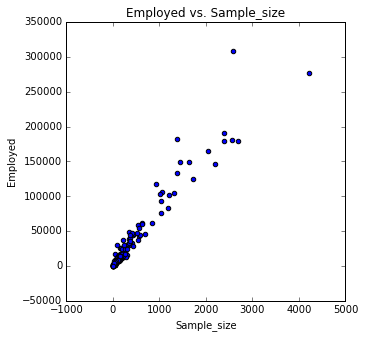

In [13]:
ax=recent_grads.plot(x="Sample_size",y="Employed",kind="scatter",figsize=(5,5))
ax.set_title("Employed vs. Sample_size")

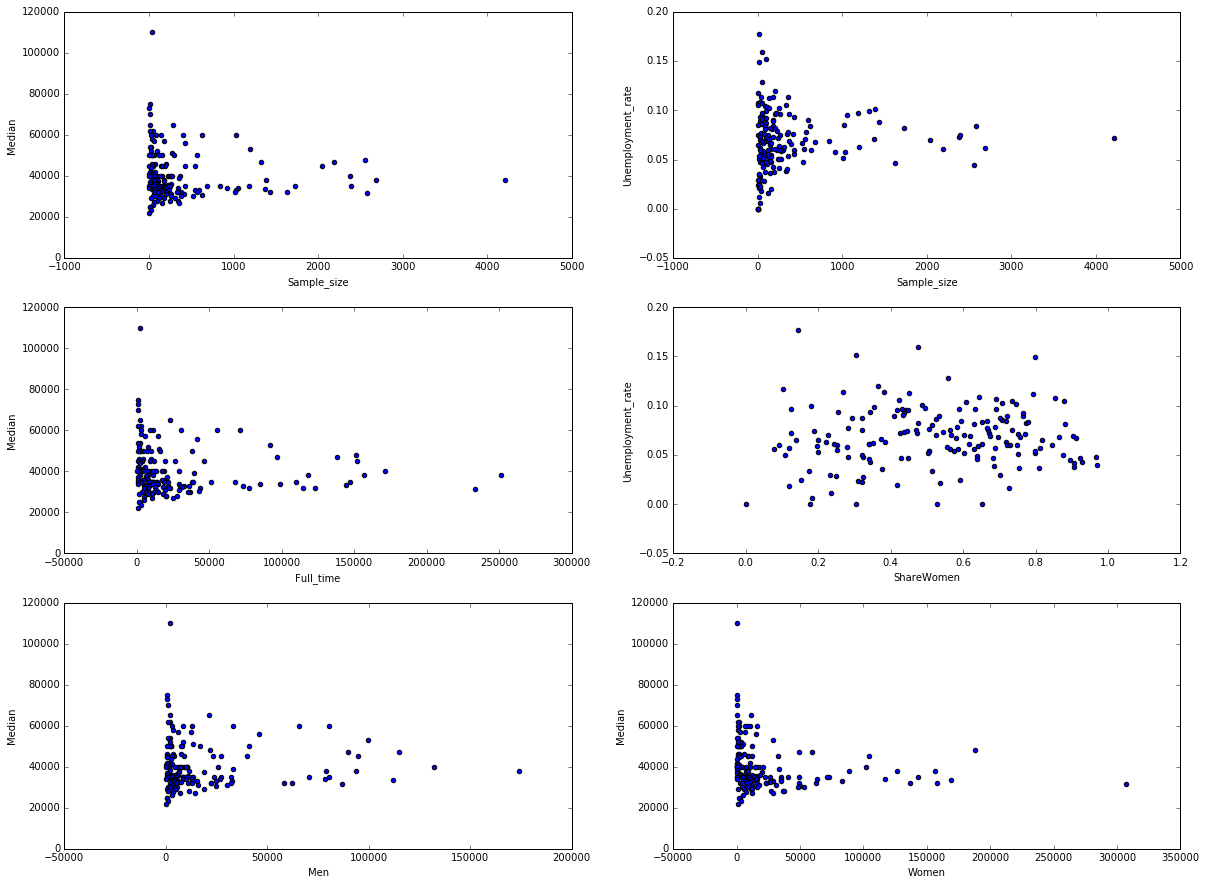

In [14]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,15))
ax1=recent_grads.plot(ax=axes[0,0],x="Sample_size",y="Median",kind="scatter")
ax2=recent_grads.plot(ax=axes[0,1],x="Sample_size",y="Unemployment_rate",kind="scatter")
ax3=recent_grads.plot(ax=axes[1,0],x="Full_time",y="Median",kind="scatter")
ax4=recent_grads.plot(ax=axes[1,1],x="ShareWomen",y="Unemployment_rate",kind="scatter")
ax5=recent_grads.plot(ax=axes[2,0],x="Men",y="Median",kind="scatter")
ax6=recent_grads.plot(ax=axes[2,1],x="Women",y="Median",kind="scatter")

### Do students in more popular majors make more money?
We will plot the total number of people in a major versus median salary to see if there is a correlation between major popularity and salary.

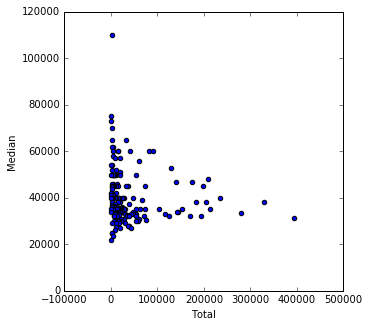

In [15]:
ax_total_median=recent_grads.plot(x="Total",y="Median",kind="scatter",figsize=(5,5))

It appears there is no correlation between major popularity and salary.

### Do students that majored in subjects that were majority female make more money?
We will plot ShareWoman versus Median salary.

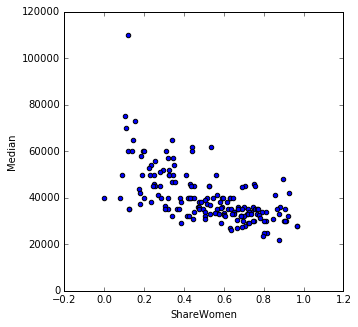

In [16]:
ax_sharewomen_median=recent_grads.plot(x="ShareWomen",y="Median",kind="scatter",figsize=(5,5))

It appears that majors that were majority female make slightly less money than ones that were majority male.

### Is there any link between the number of full-time employees and median salary?
We will plot Full_time versus median salary.

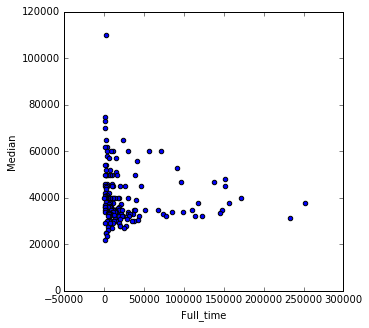

In [17]:
ax_fulltime_median=recent_grads.plot(x="Full_time",y="Median",kind="scatter",figsize=(5,5))

It appears there is no correlation between full-time status and median salary.

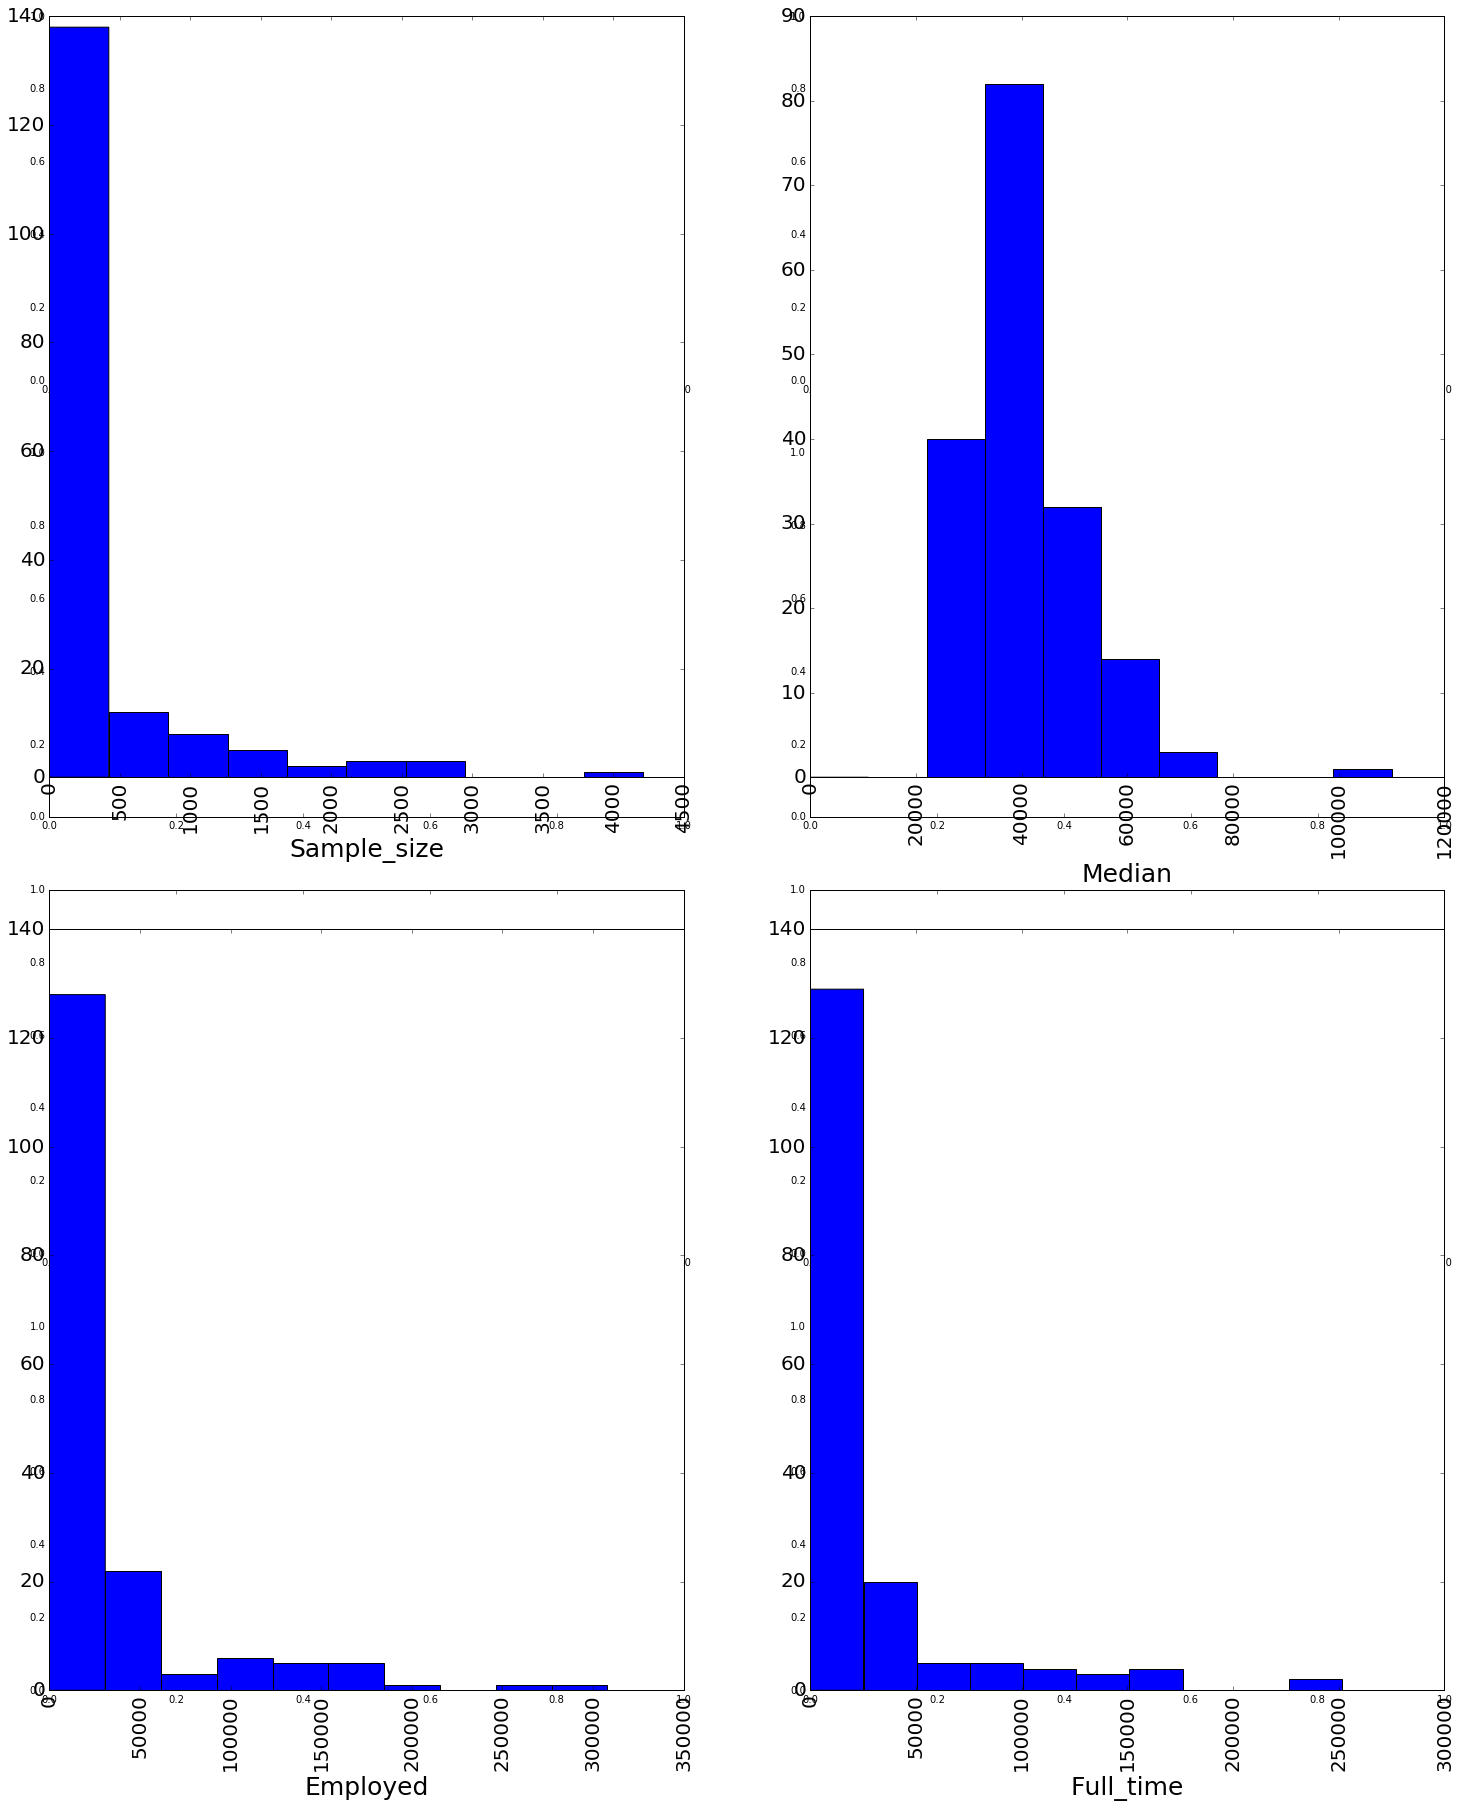

In [18]:
# Generate histograms in separate jupyter notebook cells to explore the distributions
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(25,30))
cols=["Sample_size","Median","Employed","Full_time"]
for i in range(len(cols)):
    ax=fig.add_subplot(2,2,i+1)
    ax=recent_grads[cols[i]].hist(bins=10,range=(0,max(recent_grads[cols[i]])),xrot=90,xlabelsize=20,ylabelsize=20,grid=False)
    ax.set_xlabel(cols[i],fontsize=25)

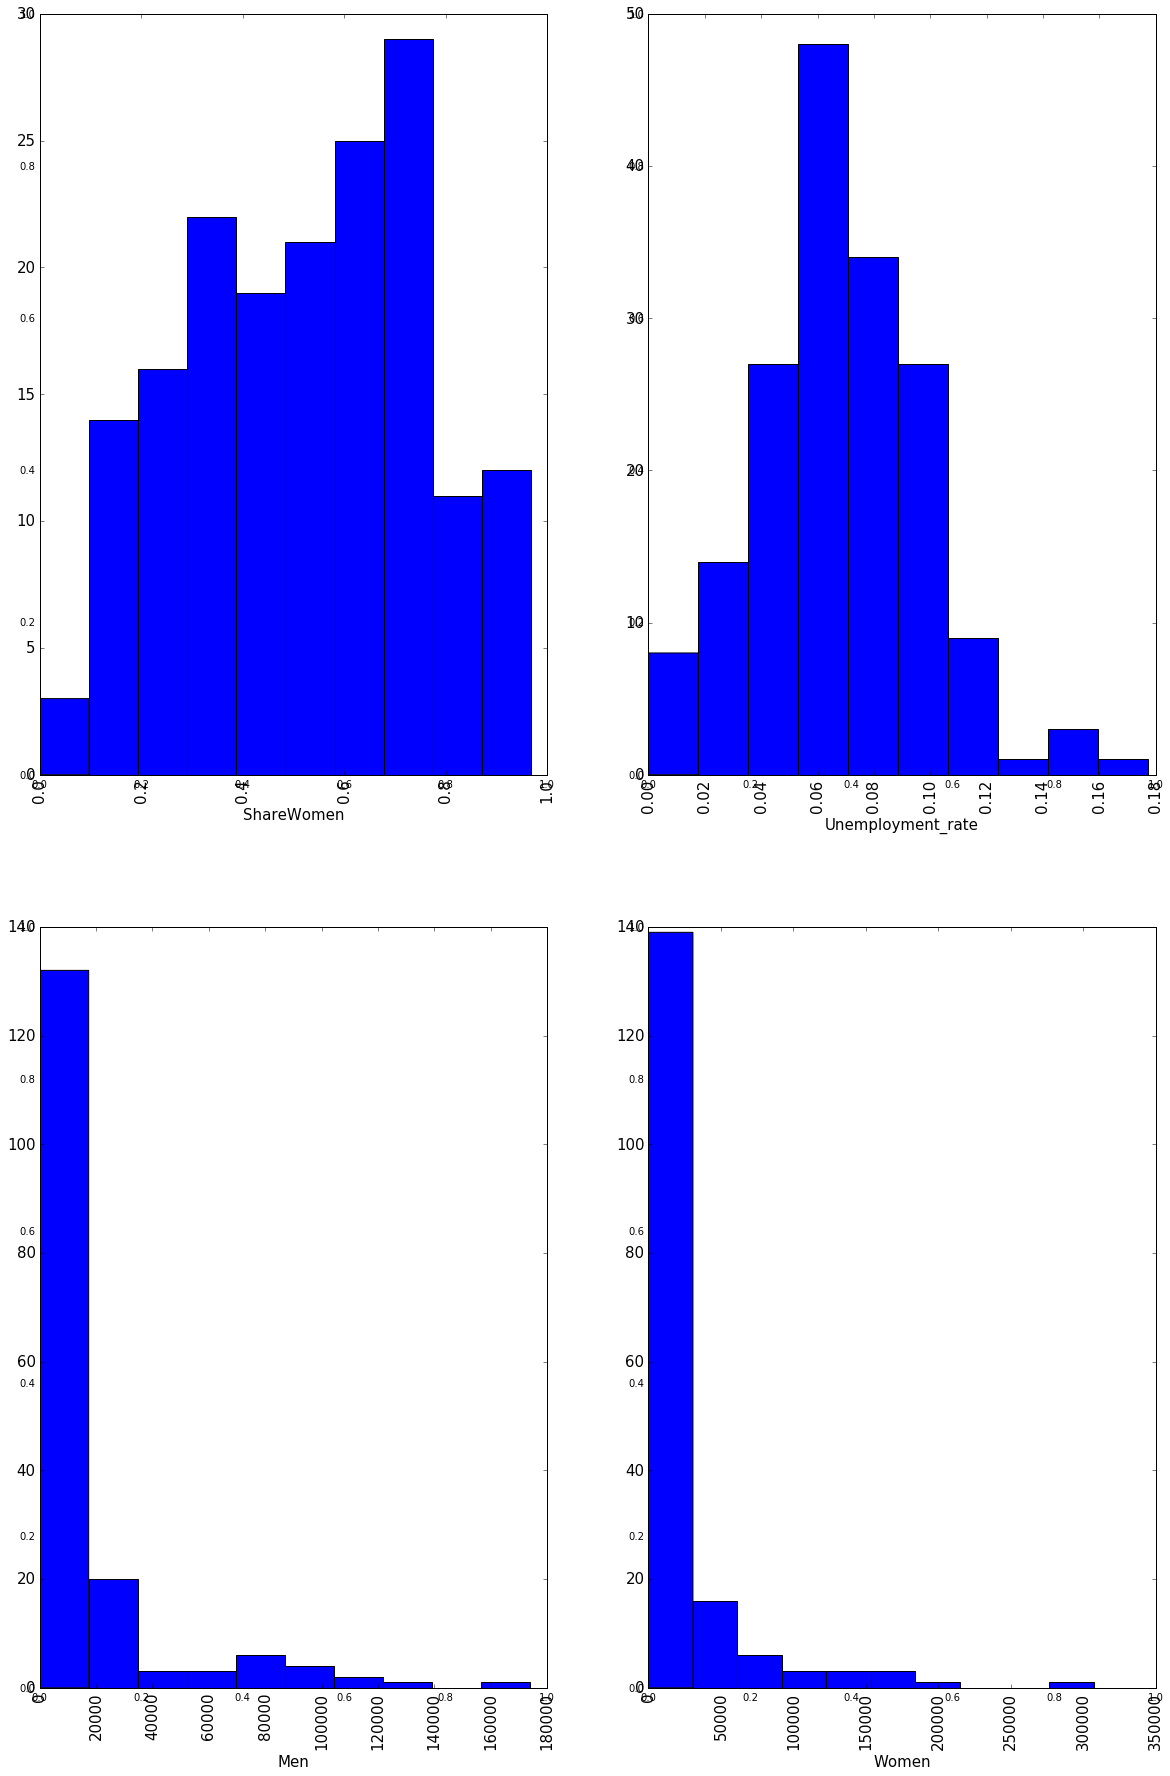

In [19]:
new_cols=["ShareWomen","Unemployment_rate","Men","Women"]
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,30))
for i in range(len(new_cols)):
    fig.add_subplot(2,2,i+1)
    ax=recent_grads[new_cols[i]].hist(bins=10,range=(0,max(recent_grads[new_cols[i]])),xrot=90,xlabelsize=15,ylabelsize=15,grid=False)
    ax.set_xlabel(new_cols[i],fontsize=15)

We will use these plots to explore the following question:
- What percent of majors are predominantly male? Predominantly female?

In [20]:
# we need to get a pivot table where we aggregate the values of men and woman for each major. Here is the code for it
major_category_men_women=recent_grads.pivot_table(index="Major_category",values=["Men","Women"],aggfunc=np.sum)
major_category_men_women

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


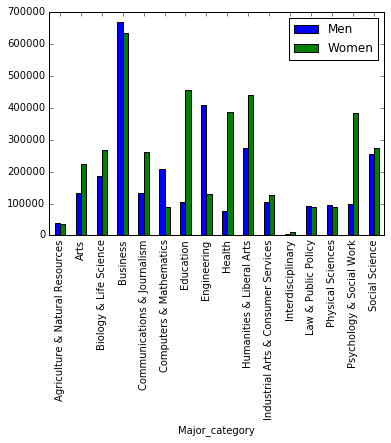

In [21]:
# make bar gragh 
major_category_men_women.plot(kind="bar")

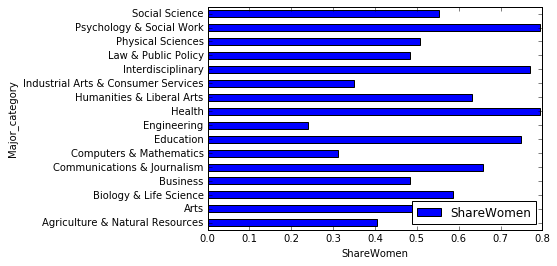

In [22]:
sharewomen_major_category=recent_grads.groupby("Major_category")[["ShareWomen"]].agg("mean").plot.barh()
sharewomen_major_category.set_xlabel("ShareWomen")

It seems the hard sciences, such as engineering and math, have much less females than majors such as social work, health, and education.

### What's the most common median salary range? 

In [23]:
most_common_median_salary=pd.cut(recent_grads["Median"],bins=10).value_counts()
most_common_median_salary

(30800.0, 39600.0]      75
(39600.0, 48400.0]      40
(21912.0, 30800.0]      24
(48400.0, 57200.0]      18
(57200.0, 66000.0]      11
(66000.0, 74800.0]       2
(101200.0, 110000.0]     1
(74800.0, 83600.0]       1
(92400.0, 101200.0]      0
(83600.0, 92400.0]       0
Name: Median, dtype: int64

\$30,800 to \$39,600 is the most common median salary range. We can now plot this on a scatterplot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6145a4978>,
      dtype=object)

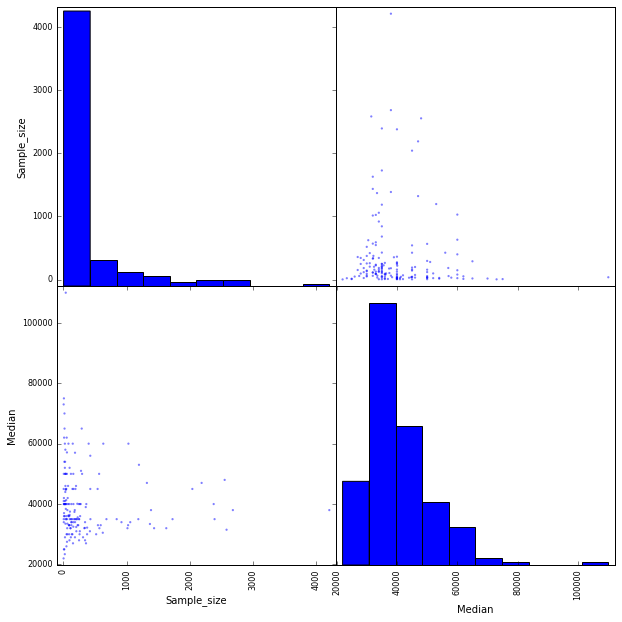

In [24]:
# use import scatter_matrix from the pandas.plotting
scatter_matrix(recent_grads[["Sample_size","Median"]],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff614072b38>,
      dtype=object)

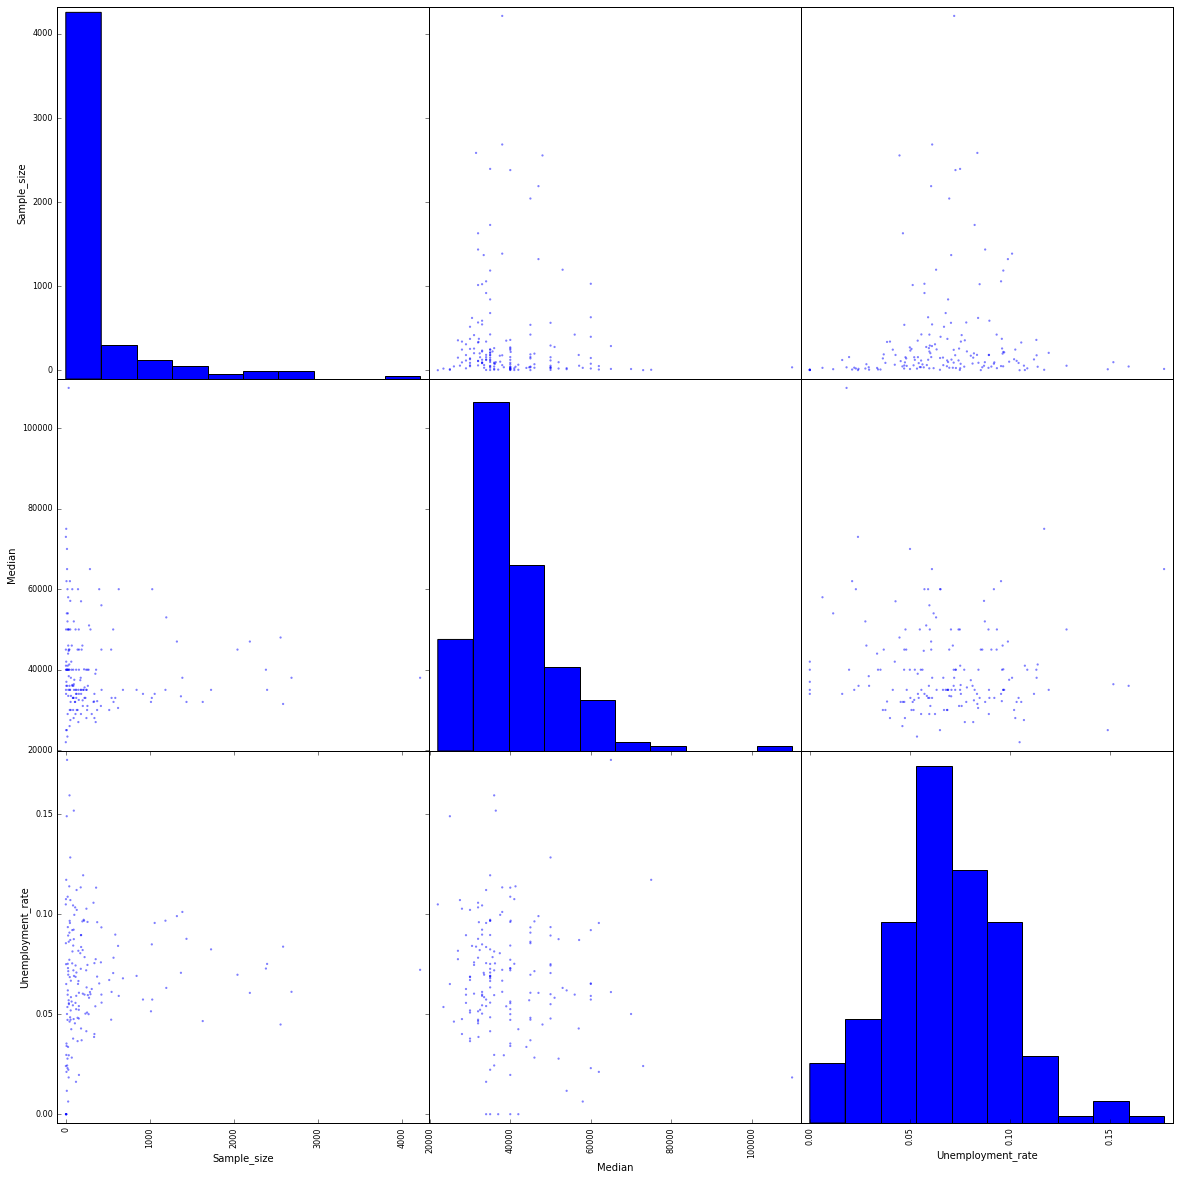

In [25]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]],figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff614983be0>,
      dtype=object)

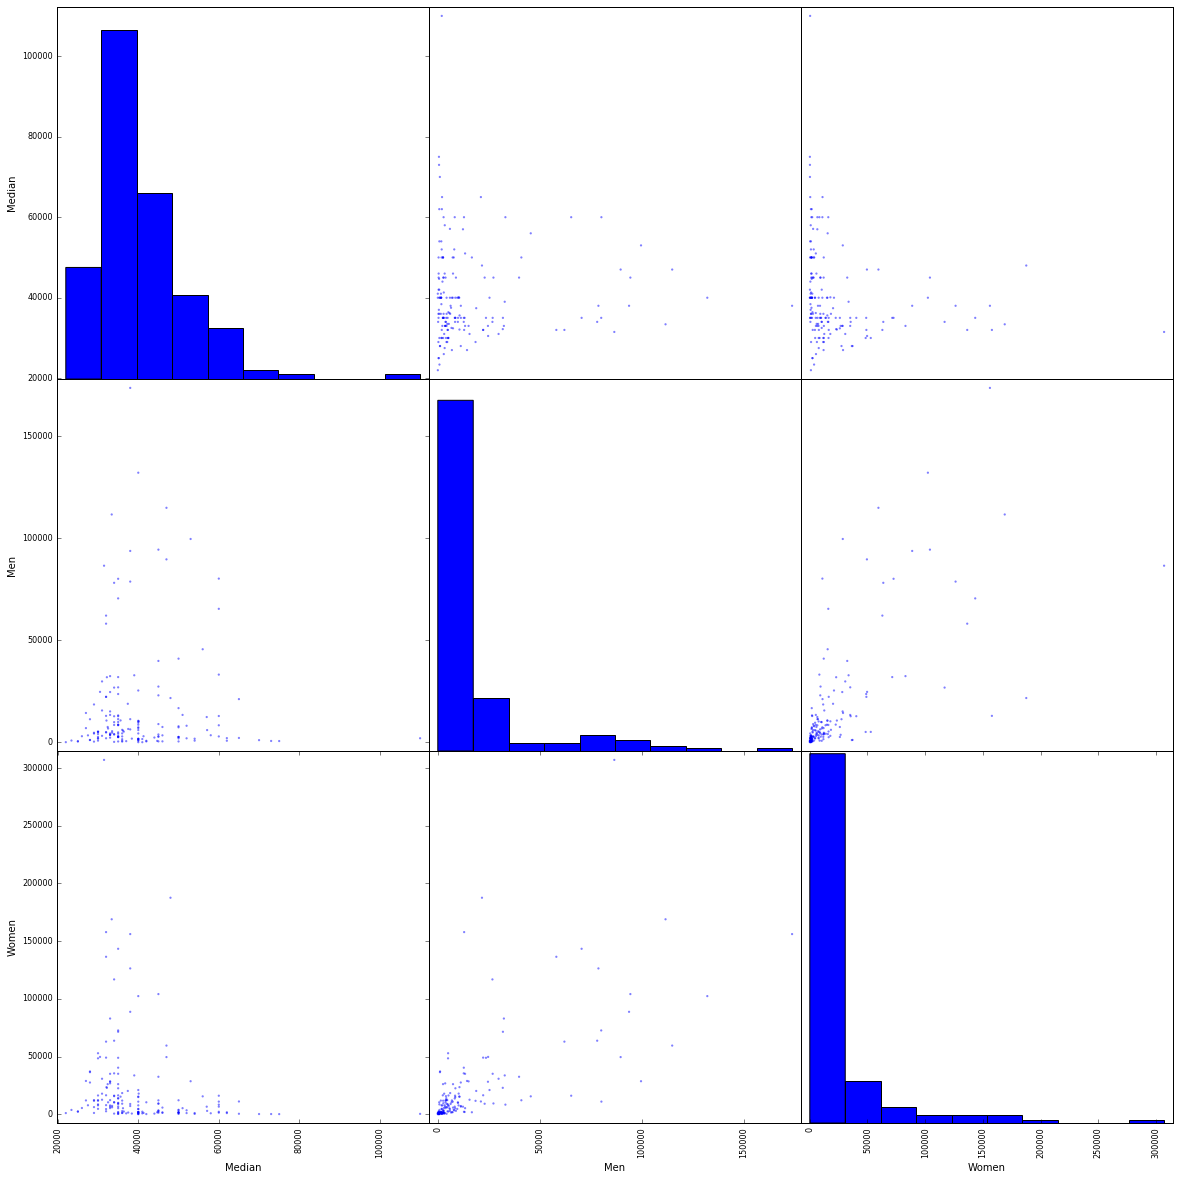

In [26]:
scatter_matrix(recent_grads[["Median","Men","Women"]],figsize=(20,20))

We will now visualize the percentage of females (ShareWoman) in each major

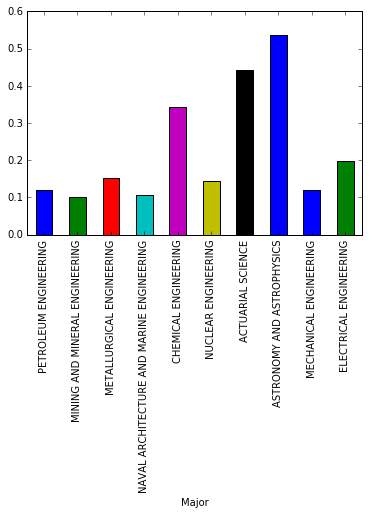

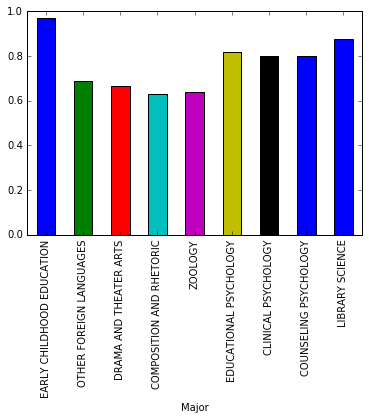

In [27]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)